<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1">Введение</a></span></li><li><span><a href="#Изучим-данные" data-toc-modified-id="Изучим-данные-2">Изучим данные</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3">Предобработка данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4">Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-4.1">Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-4.2">Гипотеза 2</a></span></li><li><span><a href="#Гипотеза-3" data-toc-modified-id="Гипотеза-3-4.3">Гипотеза 3</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5">Вывод</a></span></li></ul></div>

# Введение

Дана база опроса оценки праздничных логотипов компаний X и Y, с ответами респондентов различных возрастных групп '18 - 24 года', '25 - 34 года',  '35 - 45 лет'. На основе этих данных необходимо подтвердить или опровергнуть следующие гипотезы:

    - Распределение оценок логотипа X можно описать как нормальное
    - Логотип компании Y в среднем оценивают значимо выше, чем логотип компании X
    - Нет никакой зависимости между оценкой логотипа X и возрастом респондентов


# Изучим данные

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from scipy.stats import shapiro, anderson, normaltest
from scipy.stats import skew
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm


/Users/alexk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/alexk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_excel('/Users/alexk/Downloads/файл.xlsx')

In [3]:
df

,NN,Оцените пожалуйста **праздничные логотипы компании Х** в целом.,А теперь - **праздничные логотипы компании Y**.,Сколько вам полных лет?
0,NaN,NaN,NaN,NaN
1,1.0,Ни разу не видел(-а),Ни разу не видел(-а),25 - 34 года
2,2.0,4,7,18 - 24 года
3,3.0,9,Ни разу не видел(-а),25 - 34 года
4,4.0,7,7,35 - 45 лет
...,...,...,...,...
1465,271.0,NaN,NaN,35 - 45 лет
1466,272.0,NaN,NaN,35 - 45 лет
1467,273.0,NaN,NaN,35 - 45 лет
1468,274.0,NaN,NaN,35 - 45 лет


In [4]:
# в файле был сдвоенный заголовок, удаляем лишнюю строку
df = df.drop(index = 0)
df = df.reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 4 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   NN                                                               1469 non-null   float64
 1   Оцените пожалуйста **праздничные логотипы компании Х** в целом.  1203 non-null   object 
 2   А теперь - **праздничные логотипы компании Y**.                  1203 non-null   object 
 3   Сколько вам полных лет?                                          1469 non-null   object 
dtypes: float64(1), object(3)
memory usage: 46.0+ KB


# Предобработка данных

In [6]:
# преобразование типа данных
df['NN'] = df['NN'].astype(int)

In [7]:
# переименование столбцов
df = df.rename(columns={
    'Оцените пожалуйста **праздничные логотипы компании Х** в целом.': 'mark_x', 
    'А теперь - **праздничные логотипы компании Y**.': 'mark_y',
    'Сколько вам полных лет?': 'age'})

In [8]:
df

,NN,mark_x,mark_y,age
0,1,Ни разу не видел(-а),Ни разу не видел(-а),25 - 34 года
1,2,4,7,18 - 24 года
2,3,9,Ни разу не видел(-а),25 - 34 года
3,4,7,7,35 - 45 лет
4,6,8,9,25 - 34 года
...,...,...,...,...
1464,271,NaN,NaN,35 - 45 лет
1465,272,NaN,NaN,35 - 45 лет
1466,273,NaN,NaN,35 - 45 лет
1467,274,NaN,NaN,35 - 45 лет


In [9]:
df['age'].unique()

array(['25 - 34 года', '18 - 24 года', '35 - 45 лет'], dtype=object)

In [10]:
df['age_grade'] = df['age'].replace({'18 - 24 года': 1, 
                                   '25 - 34 года': 2,
                                   '35 - 45 лет': 3})

In [11]:
# замена оценки ни разу не видел на 0
df[['mark_x','mark_y']] = df[['mark_x','mark_y']].replace({'Ни разу не видел(-а)': 0})

In [12]:
df

,NN,mark_x,mark_y,age,age_grade
0,1,0.0,0.0,25 - 34 года,2
1,2,4.0,7.0,18 - 24 года,1
2,3,9.0,0.0,25 - 34 года,2
3,4,7.0,7.0,35 - 45 лет,3
4,6,8.0,9.0,25 - 34 года,2
...,...,...,...,...,...
1464,271,NaN,NaN,35 - 45 лет,3
1465,272,NaN,NaN,35 - 45 лет,3
1466,273,NaN,NaN,35 - 45 лет,3
1467,274,NaN,NaN,35 - 45 лет,3


In [13]:
#поскольку NN имеют циклический характер, это значит что мы имеем дело с разными когортами,
#разобъём датафрейм на несколько датафреймов, в соответствии со столбцом NN

dfs = {} #делаем словарь
i = 1 #делаем индекс для первого датафрейма

for index, row in df.iterrows(): 
    """циклом при помощи метода interrows перебираем строки в датафрейме на основании столбца NN, 
        если номер следующего элемента меньше номера предыдущего то создаём новый датафрейм"""

    if index == 0 or row['NN'] < df.iloc[index-1]['NN']:
        df_name = f'df{i}'
        dfs[df_name] = pd.DataFrame()
        i += 1
    dfs[df_name] = dfs[df_name].append(row)
        

/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_n

/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_n

/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_n

/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_n

/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_n

/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_n

/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_name] = dfs[df_name].append(row)
/var/folders/b9/9j4rxldd0d5fzcjyzp81fwzw0000gn/T/ipykernel_55866/2383835935.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[df_n

In [14]:
#количество получившихся датафреймов

len(dfs.keys())

6

In [15]:
#разделение датафреймов 
for i in range(1, len(dfs) + 1):
    df_name = f'df{i}'
    globals()[df_name] = dfs[df_name]

In [16]:
# последний датафрейм
df6

,NN,mark_x,mark_y,age,age_grade
1203,1,NaN,NaN,25 - 34 года,2
1204,2,NaN,NaN,18 - 24 года,1
1205,3,NaN,NaN,18 - 24 года,1
1206,4,NaN,NaN,35 - 45 лет,3
1207,5,NaN,NaN,35 - 45 лет,3
...,...,...,...,...,...
1464,271,NaN,NaN,35 - 45 лет,3
1465,272,NaN,NaN,35 - 45 лет,3
1466,273,NaN,NaN,35 - 45 лет,3
1467,274,NaN,NaN,35 - 45 лет,3


Результаты последнего опроса отсутствуют целиком. Удаляем эти данные из датафрейма

In [17]:
#удалим строки, в которых отсутствуют данные, это похоже на потерю данных.
df = df.dropna(subset=['mark_x', 'mark_y'])

# Проверка гипотез 

## Гипотеза 1

**Распределение оценок логотипа X можно описать как нормальное.**  
  
H0: Распределение данных может быть нормальным.  
HA: Распределение данных не является нормальным.  

In [18]:
# для тестов очищаем данные от значения 0, так как это голоса людей не видевших логотипы, 
# они не нуджны для исследования
data = df[(df['mark_x'] != 0)]['mark_x']

In [19]:
#проверка данных на нормальное распределение при помощи статистических тестов.

# тест Шапиро-Уилка
shapiro_test = shapiro(data)
shapiro_p_value = shapiro_test[1]
print("Shapiro-Wilk p-value:", shapiro_p_value)

# тест Андерсона-Дарлинга
anderson_test = anderson(data)
anderson_statistic = anderson_test.statistic
anderson_critical_values = anderson_test.critical_values
print("Anderson-Darling statistic:", anderson_statistic)
print("Anderson-Darling critical values:", anderson_critical_values)

# проверка на уровень значимости 0.05
alpha = 0.05

if shapiro_p_value < alpha:
    print("Распределение данных не является нормальным (отвергаем нулевую гипотезу)")
else:
    print("Распределение данных может быть нормальным (не отвергаем нулевую гипотезу)")

if anderson_statistic > anderson_critical_values[2]:
    print("Распределение данных не является нормальным (отвергаем нулевую гипотезу)")
else:
    print("Распределение данных может быть нормальным (не отвергаем нулевую гипотезу)")

Shapiro-Wilk p-value: 2.1422276757859975e-30
Anderson-Darling statistic: 50.610472421856684
Anderson-Darling critical values: [0.574 0.653 0.784 0.914 1.088]
Распределение данных не является нормальным (отвергаем нулевую гипотезу)
Распределение данных не является нормальным (отвергаем нулевую гипотезу)


Ассиметрия:  -1.1545313257035794
Эксцесс:  1.1504119246118854


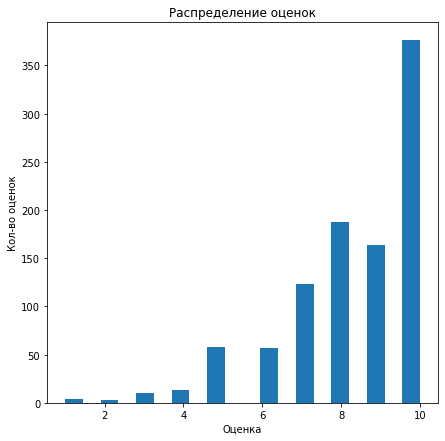

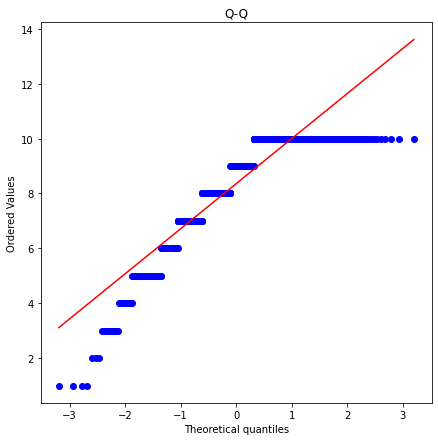

Распределение данных не является нормальным (отвергаем нулевую гипотезу)


In [20]:
# графический метод проверки 

# асимметрия и эксцесс
print("Ассиметрия: ", data.skew())
print("Эксцесс: ", data.kurt()) 

# визуальная оценка распределения
fig,ax= plt.subplots(figsize=(7,7))
ax.set_xlabel("Оценка")   
ax.set_ylabel("Кол-во оценок") 
plt.hist(data, bins=20)
plt.title('Распределение оценок')
plt.show()


# Q-Q график
# при нормальном распределдении точки ложатся примерно на прямую
fig,ax= plt.subplots(figsize=(7,7))
stats.probplot(data, plot=plt)
plt.title('Q-Q')
plt.show()


# тест хи-квадрат

chi2, p = stats.chisquare(data)

if p > alpha:
    print("Распределение данных не является нормальным (отвергаем нулевую гипотезу)")
else:
    print("Распределение данных может быть нормальным (не отвергаем нулевую гипотезу)")

In [21]:

# оценка параметров распределения методом максимального правдоподобия
best_fit_name, best_fit_params, dist = None, None, None
best_aic = np.inf

# список распределений, для поиска соответствия
distributions = [
    stats.norm,  # Нормальное распределение
    stats.expon,  # Экспоненциальное распределение
    stats.gamma,  # Гамма-распределение
    stats.lognorm  # Логнормальное распределение
]

for distribution in distributions:
    params = distribution.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    aic = stats.kstest(data, distribution.cdf, args=params)[0]

    if aic < best_aic:
        best_fit_name = distribution.name
        best_fit_params = params
        dist = distribution
        best_aic = aic

print(f"Наиболее близкое распределение: {best_fit_name}")
print(f"Параметры: {best_fit_params}")

Наиболее близкое распределение: gamma
Параметры: (348.9639241335632, -26.562309460749724, 0.10000427009171517)


## Гипотеза 2

**Логотип компании Y в среднем оценивают значимо выше, чем логотип компании X**
  
H0: Средние оценки логотипов компаний X и Y не различаются.  
HA: Средняя оценка логотипа компании Y выше, чем средняя оценка логотипа компании X.

In [22]:
#исключение оценки '0' нам важно проверить именно оценку тех кто видел логотип.
data2 = df[(df[['mark_x','mark_y']] != 0)][['mark_x','mark_y']]

In [23]:
data2 = data2.dropna(subset=['mark_x', 'mark_y'])

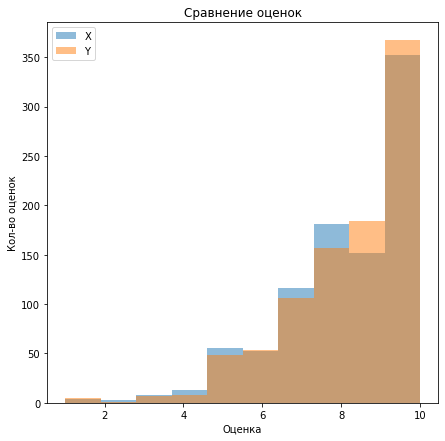

8.35576923076923
8.485042735042734


In [24]:
# визуальный метод

#гистограммы
fig,ax= plt.subplots(figsize=(7,7))
plt.hist(data2['mark_x'], alpha=0.5) 
plt.hist(data2['mark_y'], alpha=0.5)
plt.title('Сравнение оценок')
plt.legend(['X', 'Y'])
ax.set_xlabel("Оценка")   
ax.set_ylabel("Кол-во оценок") 
plt.show()

#средние
print(data2['mark_x'].mean())
print(data2['mark_y'].mean())



Из тестов для проверки гипотезы лучше использовать непараметрический U-тест Манна-Уитни, так как данные не подчинаются нормальному распределению. Этот тест является наиболее эффективным для данных, которые не распределены нормально. Так же размер выборок больше 100 наблдений, что отлично подходит для проведения этого теста.

In [25]:
# проверка при помощи u-теста Манна-Уитни
# U-тест Манна-Уитни  
u, pval = stats.mannwhitneyu(data2['mark_x'], data2['mark_y'])
print(pval) 
if pval < 0.05:
    print('P-value меньше 0.05, нулевая гипотеза отвергается')
else:
    print('P-value больше 0.05, нулевая гипотеза принимается')

0.12885650505754326
P-value больше 0.05, нулевая гипотеза принимается


Из проведенного теста можно сделать вывод что средние оценки значимо не отличаются. 

## Гипотеза 3

**Нет никакой зависимости между оценкой логотипа X и возрастом респондентов.**

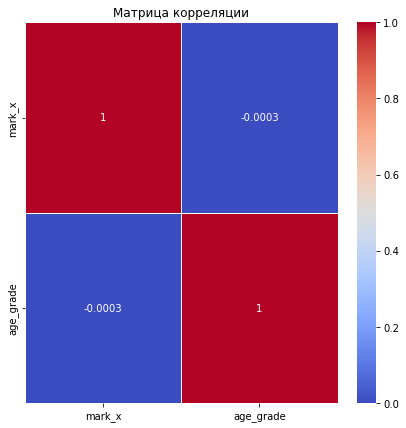

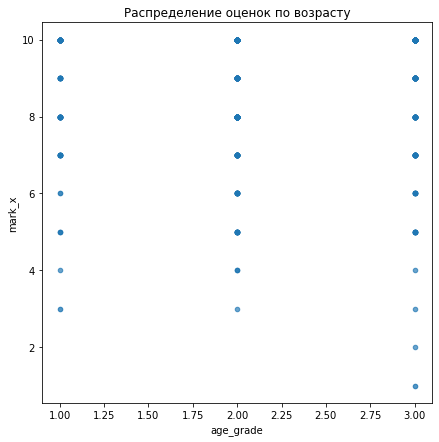

In [26]:
data3 = df[(df['mark_x'] != 0)][['mark_x','age_grade']]

correlation_matrix = data3.corr()

# Строим тепловую карту
fig,ax= plt.subplots(figsize=(7,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Матрица корреляции')
plt.show()



d3 = data3.plot(x='age_grade', y='mark_x', kind='scatter', alpha=0.3, figsize = (7,7)) 

plt.title('Распределение оценок по возрасту')
plt.show()

In [27]:
print(data3['mark_x'].corr(data3['age_grade']))

-0.00030282623077800545


Кофициент кореляции -0.0003, что рзначает почти полное отсутствие кореляции между возрастом и оценками логотипа компании X

# Вывод

После изучения данных и проверки гипотез можно сделать следующие выводы. Результаты опроса 6 когорты отсутствуют, это может быть связано с технической ошибкой, или с ошибкой внесения данных. 

По выдвинутым гипотезам можно сделать следующие выводы:  

1. Нельзя однозначно считать распределение оценок логотипа X как нормальное, как в целом по массиву данных, так и по отдельным когортам.   
2. Средние оценки логотипа Y и X значительно не различаются.   
3. Нет никакой зависимости между оценкой логотипа X и возрастом респондентов. 
